### Using the same data set of Civil_Engineering_Regression_Dataset.csv
Part 2: Simple Linear Regression
Fit a simple linear regression model where Building Height is the independent variable and Construction Cost is the dependent variable.
What is the equation of the regression line?
Interpret the coefficient: How does Building Height impact Construction Cost?
Evaluate model performance using R-squared and Mean Squared Error (MSE).


First few rows of the dataset:
   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  

Equation of regression line: Construction Cost = 992.19 + 49.67 * Building Height

Interpretation

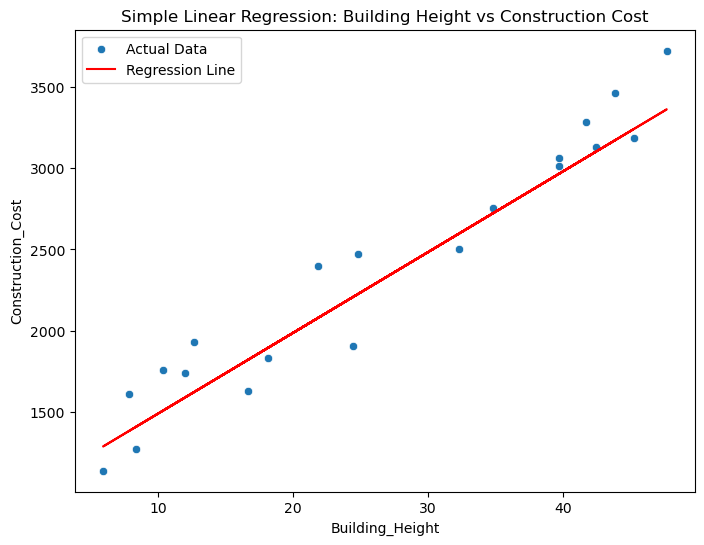

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Identify independent and dependent variables
dependent_variable = "Construction_Cost"
independent_variable = "Building_Height"

if dependent_variable not in df.columns or independent_variable not in df.columns:
    print("Error: Required columns not found. Available columns:", df.columns)
else:
    # Prepare data for regression
    X = df[[independent_variable]]  # Independent variable
    y = df[dependent_variable]  # Dependent variable
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Get regression coefficients
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"\nEquation of regression line: Construction Cost = {intercept:.2f} + {slope:.2f} * Building Height")
    
    # Interpretation of the coefficient
    print(f"\nInterpretation: For each additional unit increase in Building Height, Construction Cost changes by {slope:.2f} units.")
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nModel Performance:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    
    # Plot regression line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[independent_variable], y=y_test, label="Actual Data")
    plt.plot(X_test[independent_variable], y_pred, color='red', label="Regression Line")
    plt.xlabel("Building_Height")
    plt.ylabel("Construction_Cost")
    plt.title("Simple Linear Regression: Building Height vs Construction Cost")
    plt.legend()
    plt.show()